##Build a model to recognize disease in Grape

**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Grape image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Grape plant disease data from google drive and unzip the file

---

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Grap.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Grap* image dataset

---

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

*Get the number of directories and images on the Grap folder*


In [4]:
for directory_path,directory_name,file_names in os.walk("Grap"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 2 directories and 1 images are in :Grap
There are 4 directories and 1 images are in :Grap/train
There are 0 directories and 1692 images are in :Grap/train/Grape___healthy
There are 0 directories and 1888 images are in :Grap/train/Grape___Black_rot
There are 0 directories and 1722 images are in :Grap/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
There are 0 directories and 1920 images are in :Grap/train/Grape___Esca_(Black_Measles)
There are 4 directories and 0 images are in :Grap/valid
There are 0 directories and 423 images are in :Grap/valid/Grape___healthy
There are 0 directories and 472 images are in :Grap/valid/Grape___Black_rot
There are 0 directories and 430 images are in :Grap/valid/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
There are 0 directories and 480 images are in :Grap/valid/Grape___Esca_(Black_Measles)


Visualize some random images from selected folder


In [5]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    color="red"
    #Green text for healthy plant and red for diseased plant
    if(disease=="Grape___healthy"):color="green"
    plt.title(disease,fontsize=15,color=color)

(256, 256, 3)


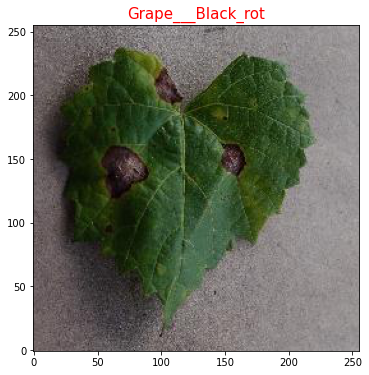

In [6]:
Random_image=np.random.choice(os.listdir("Grap/train/"))
visualize_image("Grap/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [7]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [8]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Grap/train",
                                            target_size=(256,256),
                                            class_mode="categorical",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Grap/valid",
                                         target_size=(256,256),
                                         class_mode="categorical",
                                         batch_size=32)

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [12]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(4,activation="softmax")

])
history=model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [13]:
model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata))

Epoch 1/20
226/226 [==============================] - 27s 104ms/step - loss: 0.6730 - accuracy: 0.7124 - val_loss: 0.3388 - val_accuracy: 0.8814
Epoch 2/20
226/226 [==============================] - 23s 102ms/step - loss: 0.2051 - accuracy: 0.9216 - val_loss: 0.1497 - val_accuracy: 0.9368
Epoch 3/20
226/226 [==============================] - 23s 101ms/step - loss: 0.1244 - accuracy: 0.9556 - val_loss: 0.1528 - val_accuracy: 0.9396
Epoch 4/20
226/226 [==============================] - 24s 105ms/step - loss: 0.0749 - accuracy: 0.9737 - val_loss: 0.0946 - val_accuracy: 0.9706
Epoch 5/20
226/226 [==============================] - 22s 99ms/step - loss: 0.0713 - accuracy: 0.9749 - val_loss: 0.0427 - val_accuracy: 0.9861
Epoch 6/20
226/226 [==============================] - 23s 101ms/step - loss: 0.0402 - accuracy: 0.9852 - val_loss: 0.0390 - val_accuracy: 0.9856
Epoch 7/20
226/226 [==============================] - 23s 100ms/step - loss: 0.0303 - accuracy: 0.9899 - val_loss: 0.0366 - val_acc

In [14]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

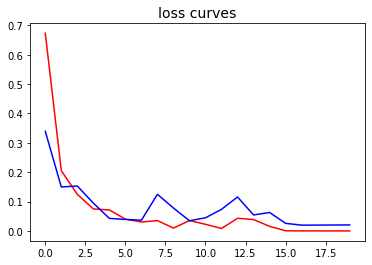

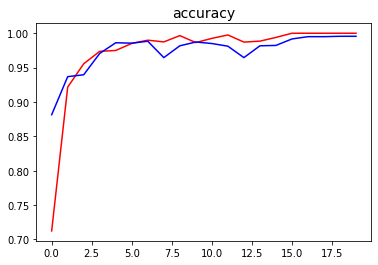

In [15]:
plot_loss_accuracy_curves(model2)

In [16]:
#Evaluate our model
model2.evaluate(validdata)

57/57 [==============================] - 4s 73ms/step - loss: 0.0204 - accuracy: 0.9956


[0.020432045683264732, 0.9955678582191467]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [17]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [18]:
train_aug_data=traindata_aug_gen.flow_from_directory('Grap/train',
                                                     target_size=(256,256),
                                                     class_mode="categorical",
                                                     batch_size=32)

Found 7222 images belonging to 4 classes.


In [19]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata))

Epoch 1/20
226/226 [==============================] - 103s 453ms/step - loss: 0.9235 - accuracy: 0.5656 - val_loss: 0.4613 - val_accuracy: 0.8006
Epoch 2/20
226/226 [==============================] - 103s 457ms/step - loss: 0.4019 - accuracy: 0.8376 - val_loss: 0.3813 - val_accuracy: 0.8704
Epoch 3/20
226/226 [==============================] - 102s 453ms/step - loss: 0.3349 - accuracy: 0.8748 - val_loss: 0.2793 - val_accuracy: 0.8853
Epoch 4/20
226/226 [==============================] - 103s 457ms/step - loss: 0.2267 - accuracy: 0.9161 - val_loss: 0.1296 - val_accuracy: 0.9540
Epoch 5/20
226/226 [==============================] - 104s 459ms/step - loss: 0.1295 - accuracy: 0.9521 - val_loss: 0.0941 - val_accuracy: 0.9712
Epoch 6/20
226/226 [==============================] - 102s 452ms/step - loss: 0.1059 - accuracy: 0.9604 - val_loss: 0.0591 - val_accuracy: 0.9751
Epoch 7/20
226/226 [==============================] - 103s 458ms/step - loss: 0.1174 - accuracy: 0.9601 - val_loss: 0.0978 -

In [20]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                  

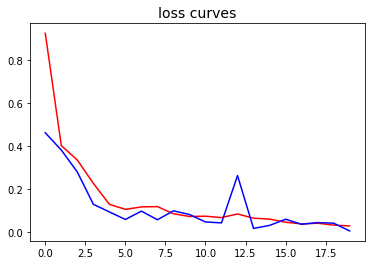

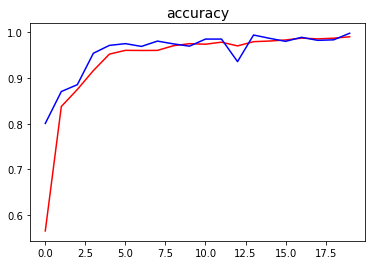

In [21]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [22]:
model3.evaluate(validdata)

57/57 [==============================] - 4s 70ms/step - loss: 0.0060 - accuracy: 0.9978


[0.005956352222710848, 0.9977839589118958]

Evaluation of validation data on `model2`

In [23]:
model2.evaluate(validdata)

57/57 [==============================] - 4s 71ms/step - loss: 0.0204 - accuracy: 0.9956


[0.020432040095329285, 0.9955678582191467]

In [24]:
model2.save("model2_Grap.h5")
model3.save("model3_Grap.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 99.77%

where `model2` gave an accuracy: 99.55%

Save the models and copy it to gdrive

In [25]:
shutil.copy("model2_Grap.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Grap.h5'

In [26]:
shutil.copy("model3_Grap.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Grap.h5'

In [27]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [28]:
class_keys=list(traindata.class_indices.keys())

In [29]:
def visualize_random_class(model):
  plt.figure(figsize=(6,5))
  class_name=np.random.choice(os.listdir("Grap/valid"))
  image_name=np.random.choice(os.listdir(os.path.join("Grap/valid",class_name)))
  img=load_and_prep_data(os.path.join("Grap/valid",class_name,image_name))
  pred=model.predict(img)
  plt.imshow(tf.squeeze(img))
  index=tf.argmax(pred[0])
  confidence=pred[0][index]
  color="red"
  if(class_name == class_keys[index]):color="green"
  plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)

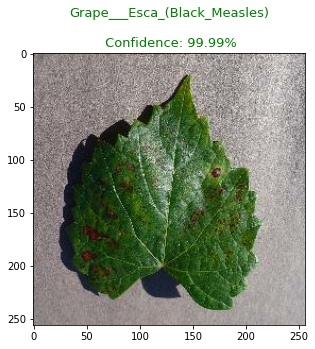

In [35]:
visualize_random_class(model2)